# Part 1: Convolution
## 1. Write the program:
To finish the task, one thing to do is to generate the masks/ filters. In particular, for the generation of Haar-like filters, different sizes must be taken into consideration.Another task to finish is to build a function that can do a 2D convolution of a filter and an image. The final step is to call the convolution function with the image and different filters as the parameters.

### 1.1. Function to do 2D convolution of an image and a filter:

In [1]:
import numpy as np
import cv2
def convolute(image, filter):
#     if filter == None:
#         print("err: in convolute(image, filter): None image or filter")
#         return None
    imageSizeX = image.shape[0]
    imageSizeY = image.shape[1]
    filterSizeX = filter.shape[0]
    filterSizeY = filter.shape[1]
    outputSizeX = imageSizeX
    outputSizeY = imageSizeY
    output = output = np.zeros((outputSizeX, outputSizeY))
    # Go through all the positions. For a fixed posirion, apply the filter (stick the filter on the image from the position),
    for posX in range(0, imageSizeX-filterSizeX+1):
        for posY in range(0, imageSizeY-filterSizeY+1):
            # Local Convolution: Then use index i and j to visit filter(i, j) and image(posX+i, posY+j), multiply and sum to F
            F=0
            for i in range(0, filterSizeX):
                for j in range(0, filterSizeY):
                    F+=filter[i][j]*image[posX+i][posY+j]
            outputPosX = int(posX+filterSizeX/2)
            outputPosY = int(posY+filterSizeY/2)
            if (outputPosX < outputSizeX and outputPosY < outputSizeY):
                output[outputPosX][outputPosY] = F
            # Give F to a position on the output 
    return output

In [2]:
# # testing block:
# image=np.array([[0,1],[3,10]])
# filter = np.array([[-1,1],[1,-1]])
# print(convolute(image, filter))
# image1=np.array([[0,1,2],[3,10,12],[4,8,9]])
# print(convolute(image1, filter))
# image2=np.array([[0,1,2],[3,10,12],[4,8,9],[1,0,5]])
# print(convolute(image2, filter))
# filter1 = np.array([[-1,0,1]])
# print(convolute(image2, filter1))
# filter2 = np.array([[-1,1]])

# from PIL import Image
# from pylab import *
# image3 = np.array(Image.open('einstein.png').convert('L'),'f')
# output=convolute(image3, filter2)
# image = plt.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [3]:
# output=convolute(image3, filter1)
# image = plt.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [4]:
# output=convolute(image3, filter)
# image = plt.imshow(output, cmap='gray', interpolation='none')
# plt.show()

### 1.2. Filter Generation:

Now build the function to generate filters.there are in general 3 types of filters: the Gaussian Filter, the Sobel filter and the Haar-like filters. For the generation of Haar-like filters, the program must be able to set the size of the filters. Thus two parameters are required for the function: filterType and filterSize.

As for the Gaussian filter, the continuous Gaussian distribution is given by:
\begin{align}
h_{\sigma}(x, y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
\end{align}
The center of the Gaussian distribution is $(x = 0, y = 0)$. To move that to the kernel center $(x = \lfloor \frac{kernelSize}{2} \rfloor, y = \lfloor \frac{kernelSize}{2} \rfloor), kernelSize = 2k+1$ we need:
\begin{align}
g_{\sigma}(x, y)=h_{\sigma}(x-\lfloor \frac{kernelSizeX}{2} \rfloor, y-\lfloor \frac{kernelSizeY}{2} \rfloor)
\end{align}
For kernelSize that is $2k$, or say, kernelSize is an even number, we need get it to the nearest odd number by $-1$.

The program uses two functions to generate a filter of indicated size. The first one, getFilterOfSize(filterType, filterSize) generates a minimal filter as the "mold" of the filter, e.g. For haar1 filter, the program generates the minimal mold of size 1 by 2. Then the  sencond function augmentFilter(filter, filterType, augTimes) enlarges the mold filter to a desired larger size.

In [5]:
import numpy as np
def getFilterOfSize(filterType, filterSize):
    # Generates Haar-like filters and Gaussian of different sizes. Generate Sobel filters of fixed 3 by 3 size.
    # filterType: a String discribing the type of the filter. It can take one of the 7 values: 'gaussian', 'sobel', 'haar1', 'haar2','haar3','haar4' or 'haar5'
    # filterSize: size of the Gaussian or Sobel filter that is to be generated.
    if filterType == 'gaussian':
        sigma = 2
        filter = np.zeros((filterSize, filterSize))
        indexShift = filterSize//2
#         print(indexShift)
        for i in range(0,filterSize):
            for j in range(0,filterSize):
                filter[i][j]=(1/(2*np.pi*sigma**2))*np.exp(-((i-indexShift)**2 + (j-indexShift)**2)/(2*sigma**2))
    elif filterType == 'sobel':
        filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif filterType == 'haar1':
        filter = np.array([[-1,1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar2':
        filter = np.array([[-1],[1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar3':
        filter = np.array([[-1,1,-1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar4':
        filter = np.array([[-1],[1],[-1]])
        filter = augmentFilter(filter, filterType, filterSize)
    elif filterType == 'haar5':
        filter = np.array([[-1,1],[1,-1]])  
        filter = augmentFilter(filter, filterType, filterSize)
    return filter

In [6]:
def augmentFilter(filter, filterType, augTimes):
    # Enlarges the filter of smallest size to the certain size of augTimes.
    # filter: the original/ minimal size of the filter 
    # filterType: a String discribing the type of the filter. It can take one of the 7 values: 'gaussian', 'sobel', 'haar1', 'haar2','haar3','haar4' or 'haar5'
    # augTimes: the final size of the filter that is to be generated
    filterSizeX = filter.shape[0]
    filterSizeY = filter.shape[1]
    augFilterSizeX = filterSizeX * augTimes
    augFilterSizeY = filterSizeY * augTimes
    
    if filterType == 'gaussian':
        filter = filter
#         from scipy.ndimage import gaussian_filter
#         array = np.arange(50, step=2).reshape((5,5))
#         filter = gaussian_filter(array, sigma=1)
    elif filterType == 'sobel':
        filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    elif filterType == 'haar1':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if j < (augFilterSizeY)/2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar2':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if i < (augFilterSizeX)/2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar3':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if j >= (augFilterSizeY)/3 and j < augFilterSizeY/3*2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar4':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if i >= (augFilterSizeX)/3 and i < augFilterSizeX/3*2:
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    elif filterType == 'haar5':
        augFilter = np.zeros((augFilterSizeX, augFilterSizeY))
        for i in range(augFilterSizeX):
            for j in range(augFilterSizeY):
                if (i < (augFilterSizeX)/2 and j < augFilterSizeY/2) or (i >= augFilterSizeX/2 and j >= augFilterSizeY/2):
                    augFilter[i][j] = -1
                else:
                    augFilter[i][j] = 1
    
    return augFilter

## 2. Result of Convolutions

The original Image is as follows:

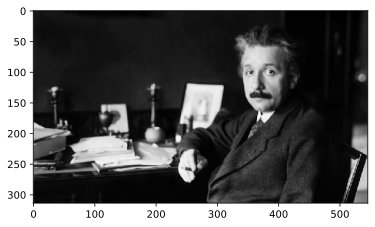

In [7]:
from PIL import Image
from pylab import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

image = np.array(Image.open('einstein.png').convert('L'),'f')
plt.imshow(image, cmap='gray', interpolation='none')
plt.show()

### 2.1. Applying Gaussian Filters to the Image

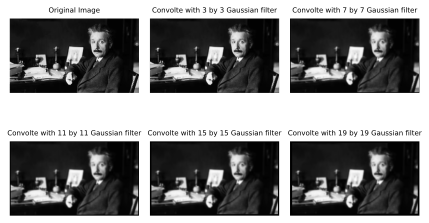

In [8]:
# testing block of gaussian filter:
gauFilter3 = getFilterOfSize('gaussian',3)
gauFilter7 = getFilterOfSize('gaussian',7)
gauFilter11 = getFilterOfSize('gaussian',11)
gauFilter15 = getFilterOfSize('gaussian',15)
gauFilter19 = getFilterOfSize('gaussian',19)

# fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

output3By3 = convolute(image, gauFilter3)
output7By7 = convolute(image, gauFilter7)
output11By11 = convolute(image, gauFilter11)
output15By15 = convolute(image, gauFilter15)
output19By19 = convolute(image, gauFilter19)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(output3By3, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 3 by 3 Gaussian filter', fontsize = 7)
ax3.imshow(output7By7, cmap='gray', interpolation='none')
ax3.set_title('Convolte with 7 by 7 Gaussian filter', fontsize = 7)
ax4.imshow(output11By11, cmap='gray', interpolation='none')
ax4.set_title('Convolte with 11 by 11 Gaussian filter', fontsize = 7)
ax5.imshow(output15By15, cmap='gray', interpolation='none')
ax5.set_title('Convolte with 15 by 15 Gaussian filter', fontsize = 7)
ax6.imshow(output19By19, cmap='gray', interpolation='none')
ax6.set_title('Convolte with 19 by 19 Gaussian filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.tight_layout()
plt.show()

### 2.2. Applying Sobel Filters to the Image

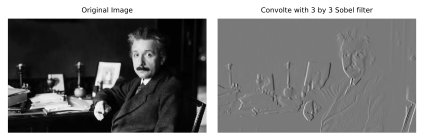

In [9]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

sobFilter = getFilterOfSize('sobel',1)
outputSob=convolute(image, sobFilter)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(outputSob, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 3 by 3 Sobel filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')

plt.tight_layout()
plt.show()

### 2.3. Applying Type-1-Haar-like Filters to the Images:

#### 2.3.1. Applying the horizontal type-1-Haar-like filter:

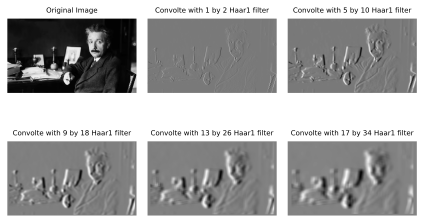

In [10]:
# Testing block for haar1:
haar1Filter1 = getFilterOfSize('haar1',1)
haar1Filter5 = getFilterOfSize('haar1',5)
haar1Filter9 = getFilterOfSize('haar1',9)
haar1Filter13 = getFilterOfSize('haar1',13)
haar1Filter17 = getFilterOfSize('haar1',17)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

output1By1=convolute(image, haar1Filter1)
output5by5=convolute(image, haar1Filter5)
output9by9=convolute(image, haar1Filter9)
output13by13=convolute(image, haar1Filter13)
output17by17=convolute(image, haar1Filter17)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(output1By1, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 1 by 2 Haar1 filter', fontsize = 7)
ax3.imshow(output5by5, cmap='gray', interpolation='none')
ax3.set_title('Convolte with 5 by 10 Haar1 filter', fontsize = 7)
ax4.imshow(output9by9, cmap='gray', interpolation='none')
ax4.set_title('Convolte with 9 by 18 Haar1 filter', fontsize = 7)
ax5.imshow(output13by13, cmap='gray', interpolation='none')
ax5.set_title('Convolte with 13 by 26 Haar1 filter', fontsize = 7)
ax6.imshow(output17by17, cmap='gray', interpolation='none')
ax6.set_title('Convolte with 17 by 34 Haar1 filter', fontsize = 7)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.tight_layout()
plt.show()

#### 2.3.2. Applying the vertical type-1-Haar-like filter:

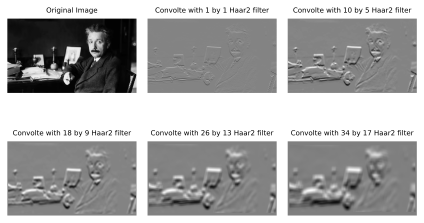

In [11]:
# testing block for haar2:
# Testing block for haar1:
haar2Filter1 = getFilterOfSize('haar2',1)
haar2Filter5 = getFilterOfSize('haar2',5)
haar2Filter9 = getFilterOfSize('haar2',9)
haar2Filter13 = getFilterOfSize('haar2',13)
haar2Filter17 = getFilterOfSize('haar2',17)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

output1By1=convolute(image, haar2Filter1)
output5by5=convolute(image, haar2Filter5)
output9by9=convolute(image, haar2Filter9)
output13by13=convolute(image, haar2Filter13)
output17by17=convolute(image, haar2Filter17)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(output1By1, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 1 by 1 Haar2 filter', fontsize = 7)
ax3.imshow(output5by5, cmap='gray', interpolation='none')
ax3.set_title('Convolte with 10 by 5 Haar2 filter', fontsize = 7)
ax4.imshow(output9by9, cmap='gray', interpolation='none')
ax4.set_title('Convolte with 18 by 9 Haar2 filter', fontsize = 7)
ax5.imshow(output13by13, cmap='gray', interpolation='none')
ax5.set_title('Convolte with 26 by 13 Haar2 filter', fontsize = 7)
ax6.imshow(output17by17, cmap='gray', interpolation='none')
ax6.set_title('Convolte with 34 by 17 Haar2 filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.tight_layout()
plt.show()

### 2.4. Applying Type-2-Haar-like Filters to the Images:

#### 2.4.1. Applying the horizontal type-2-Haar-like filter:

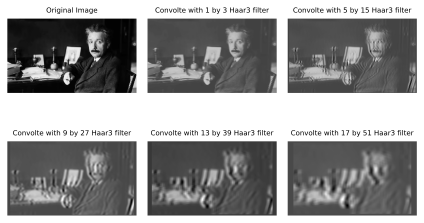

In [12]:
# testing block for haar2:
# Testing block for haar1:
haar3Filter1 = getFilterOfSize('haar3',1)
haar3Filter5 = getFilterOfSize('haar3',5)
haar3Filter9 = getFilterOfSize('haar3',9)
haar3Filter13 = getFilterOfSize('haar3',13)
haar3Filter17 = getFilterOfSize('haar3',17)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

output1By1=convolute(image, haar3Filter1)
output5by5=convolute(image, haar3Filter5)
output9by9=convolute(image, haar3Filter9)
output13by13=convolute(image, haar3Filter13)
output17by17=convolute(image, haar3Filter17)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(output1By1, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 1 by 3 Haar3 filter', fontsize = 7)
ax3.imshow(output5by5, cmap='gray', interpolation='none')
ax3.set_title('Convolte with 5 by 15 Haar3 filter', fontsize = 7)
ax4.imshow(output9by9, cmap='gray', interpolation='none')
ax4.set_title('Convolte with 9 by 27 Haar3 filter', fontsize = 7)
ax5.imshow(output13by13, cmap='gray', interpolation='none')
ax5.set_title('Convolte with 13 by 39 Haar3 filter', fontsize = 7)
ax6.imshow(output17by17, cmap='gray', interpolation='none')
ax6.set_title('Convolte with 17 by 51 Haar3 filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.tight_layout()
plt.show()

#### 2.4.2. Applying the vertical type-2-Haar-like filter:

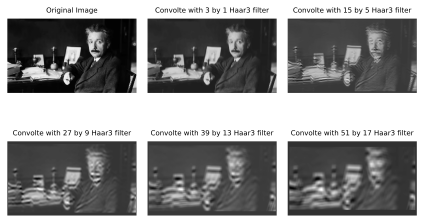

In [13]:
# testing block for haar2:
# Testing block for haar1:
haar4Filter1 = getFilterOfSize('haar4',1)
haar4Filter5 = getFilterOfSize('haar4',5)
haar4Filter9 = getFilterOfSize('haar4',9)
haar4Filter13 = getFilterOfSize('haar4',13)
haar4Filter17 = getFilterOfSize('haar4',17)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

output1By1=convolute(image, haar4Filter1)
output5by5=convolute(image, haar4Filter5)
output9by9=convolute(image, haar4Filter9)
output13by13=convolute(image, haar4Filter13)
output17by17=convolute(image, haar4Filter17)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(output1By1, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 3 by 1 Haar3 filter', fontsize = 7)
ax3.imshow(output5by5, cmap='gray', interpolation='none')
ax3.set_title('Convolte with 15 by 5 Haar3 filter', fontsize = 7)
ax4.imshow(output9by9, cmap='gray', interpolation='none')
ax4.set_title('Convolte with 27 by 9 Haar3 filter', fontsize = 7)
ax5.imshow(output13by13, cmap='gray', interpolation='none')
ax5.set_title('Convolte with 39 by 13 Haar3 filter', fontsize = 7)
ax6.imshow(output17by17, cmap='gray', interpolation='none')
ax6.set_title('Convolte with 51 by 17 Haar3 filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.tight_layout()
plt.show()

### 2.5. Applying Type-3-Haar-like Filters to the Images:

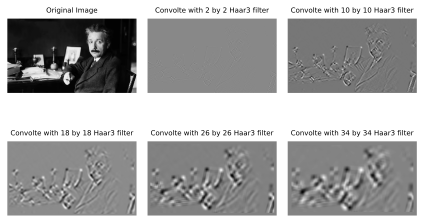

In [14]:
# testing block for haar2:
# Testing block for haar1:
haar5Filter1 = getFilterOfSize('haar5',1)
haar5Filter5 = getFilterOfSize('haar5',5)
haar5Filter9 = getFilterOfSize('haar5',9)
haar5Filter13 = getFilterOfSize('haar5',13)
haar5Filter17 = getFilterOfSize('haar5',17)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3)

output1By1=convolute(image, haar5Filter1)
output5by5=convolute(image, haar5Filter5)
output9by9=convolute(image, haar5Filter9)
output13by13=convolute(image, haar5Filter13)
output17by17=convolute(image, haar5Filter17)

ax1.imshow(image, cmap='gray', interpolation='none')
ax1.set_title('Original Image', fontsize = 7)
ax2.imshow(output1By1, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 2 by 2 Haar3 filter', fontsize = 7)
ax3.imshow(output5by5, cmap='gray', interpolation='none')
ax3.set_title('Convolte with 10 by 10 Haar3 filter', fontsize = 7)
ax4.imshow(output9by9, cmap='gray', interpolation='none')
ax4.set_title('Convolte with 18 by 18 Haar3 filter', fontsize = 7)
ax5.imshow(output13by13, cmap='gray', interpolation='none')
ax5.set_title('Convolte with 26 by 26 Haar3 filter', fontsize = 7)
ax6.imshow(output17by17, cmap='gray', interpolation='none')
ax6.set_title('Convolte with 34 by 34 Haar3 filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

plt.tight_layout()
plt.show()

## 3. Conclusions

### 3.1. General Conclusion

Generally speaking, the bigger a kernel is, the more obvious the effect of the kernel on an image is. But the time needed to compute the convolution will also increase.

### 3.2. Conclusion for Each Kernel

Gaussian kernels blur the image. The larger a gaussian kernel is, the more fuzzy the resulted image will be.   
Seeing from the mathmatical definition, when convoluted with a Gaussian kernel, the gray scale value of each position within the scope of the gaussian kernel will be given a "weight" according to the Gaussian distribution value. Then the re-weighted gray scale values will be summed up. The sum will be given to the position at center of the kernel.So applying Gaussian kernel at one pixel provides a "local average" of the gray scale value. Thus, this creates a fuzzy effect.

The Sobel Kernel gives edges. Here, since the kernel is defined in a way that the left-most column has negative values while the right-most column has positive values, the gray scales left to a pixel and right to a pixel are compared.So the resulted image has clear "vertical edges".

The type-1-Haar-like filters give edges as well. When the sizes of ther kernels increases, the edges become larger. The horizontal filters gives clearer "vertical edges", while the vertical filters gives clearer "horizontal edges".

The type-2-Haar-like filters seems to distort the image, or produces a double ghoast image on the original one. and the larger the kernels are, the more severe the double effect is. But from my perspective, the type-2-Haar-like filters actually stress the "peaks" or "valleys". The peak is when the gray scale value is light in the middle but dark on the sides. Similarly, a valley is to say that the gray scale value in the middle is dark but that on the sides are dark. When applied with the type-2-Haar-like filters, the peak gray scale values will become lighter while the valley gray scale values will become darker than before. This is to say that the peaks and the valleys are stressed.  
For edges or slope case, where one side from the middle is dark while the other side from the middle is light, the change of the middle gray scale value after applied with the kernel is mild compared to the peaks and valley cases. 
For a plateau, where the gray scales are all light or dark regardless of the positions of the pixels, the kernel flattens the local gray scale values to make it smoother. 
Clues can also be observed from the resulted images: the middle of the paper is a bit blured, while the edges of papers are stressed and even isolated. 
When the sizes of ther kernels increases, the edges stressed become larger. The horizontal filters gives clearer "vertical edges", while the vertical filters gives clearer "horizontal edges".

The type-3-Haar-like filters give corners. When the sizes of ther kernels increases, the coners become bigger.

### 3.3. Comparing the 3 by 3 Sobel kernel with the 3 by 6 type-1-Haar-like kernel:

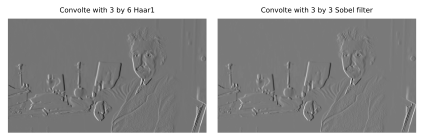

In [15]:
#test block:
fig = plt.figure()
ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)

sobFilter = getFilterOfSize('sobel',1)
haar2Filter = getFilterOfSize('haar1',2)
outputSob=convolute(image, sobFilter)
outputHaar=convolute(image, haar2Filter)

ax1.imshow(outputHaar, cmap='gray', interpolation='none')
ax1.set_title('Convolte with 3 by 6 Haar1', fontsize = 7)
ax2.imshow(outputSob, cmap='gray', interpolation='none')
ax2.set_title('Convolte with 3 by 3 Sobel filter', fontsize = 7)
ax1.axis('off')
ax2.axis('off')

plt.tight_layout()
plt.show()

The effects of 3 by 6 type-1-Haar-like filter and 3 by 3 Sobel filter are similar. But it seems that the edges given by the Sobel kernel is sharper than that given by the type-1-Haar-like filter. 

In [16]:
# # testing block of augmentFilter haar4:
# print(augmentFilter(np.array([[1],[-1],[1]]),'haar4',2))
# print(augmentFilter(np.array([[1],[-1],[1]]),'haar4',4))

# fig = plt.figure()

# f, axarr = plt.subplots(3,1) 

# filter5 = getFilterOfSize('haar4',5)
# filter6 = getFilterOfSize('haar4',1)
# filter7 = getFilterOfSize('haar4',10)
# output=convolute(image3, filter5)
# output1=convolute(image3, filter6)
# output2=convolute(image3, filter7)

# axarr[0].imshow(output1, cmap='gray', interpolation='none')
# axarr[1].imshow(output, cmap='gray', interpolation='none')
# axarr[2].imshow(output2, cmap='gray', interpolation='none')

In [17]:
# # testing block of augmentFilter haar5:
# print(augmentFilter(np.array([[-1,1],[1,-1]]),'haar5',2))
# print(augmentFilter(np.array([[-1,1],[1,-1]]),'haar5',5))

# fig = plt.figure()

# f, axarr = plt.subplots(3,1) 

# filter5 = getFilterOfSize('haar5',5)
# filter6 = getFilterOfSize('haar5',1)
# filter7 = getFilterOfSize('haar5',10)
# output=convolute(image3, filter5)
# output1=convolute(image3, filter6)
# output2=convolute(image3, filter7)

# axarr[0].imshow(output1, cmap='gray', interpolation='none')
# axarr[1].imshow(output, cmap='gray', interpolation='none')
# axarr[2].imshow(output2, cmap='gray', interpolation='none')

In [18]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter3 = getFilterOfSize('gaussian',1)
# print(filter3)
# # output=convolute(image3, filter3)


# # ax1.imshow(image3, cmap='gray', interpolation='none')
# # ax2.imshow(output, cmap='gray', interpolation='none')
# # plt.show()

In [19]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter4 = getFilterOfSize('sobel',1)
# output=convolute(image3, filter4)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [20]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter5 = getFilterOfSize('haar1',1)
# output=convolute(image3, filter5)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [21]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter6 = getFilterOfSize('haar2',1)
# output=convolute(image3, filter6)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [22]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter7 = getFilterOfSize('haar3',1)
# output=convolute(image3, filter7)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [23]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter8 = getFilterOfSize('haar4',1)
# output=convolute(image3, filter8)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [24]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter9 = getFilterOfSize('haar5',1)
# output=convolute(image3, filter9)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()

In [25]:
# #test block:
# fig = plt.figure()
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)

# filter9 = getFilterOfSize('haar?',1)
# output=convolute(image3, filter9)

# ax1.imshow(image3, cmap='gray', interpolation='none')
# ax2.imshow(output, cmap='gray', interpolation='none')
# plt.show()